In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
pip install matplotlib

In [9]:
pip install seaborn

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
data = pd.read_csv('Investment Avenue data.csv')
data.head()

,gender,age,Stock_Marktet,Factor,Objective,Purpose,Duration,Invest_Monitor,Expect,Avenue
0,Female,34,Yes,Returns,Capital Appreciation,Wealth Creation,1-3 years,Monthly,20%-30%,Mutual Fund
1,Female,23,No,Locking Period,Capital Appreciation,Wealth Creation,More than 5 years,Weekly,20%-30%,Mutual Fund
2,Male,30,Yes,Returns,Capital Appreciation,Wealth Creation,3-5 years,Daily,20%-30%,Equity
3,Male,22,Yes,Returns,Income,Wealth Creation,Less than 1 year,Daily,10%-20%,Equity
4,Female,24,No,Returns,Income,Wealth Creation,Less than 1 year,Daily,20%-30%,Equity


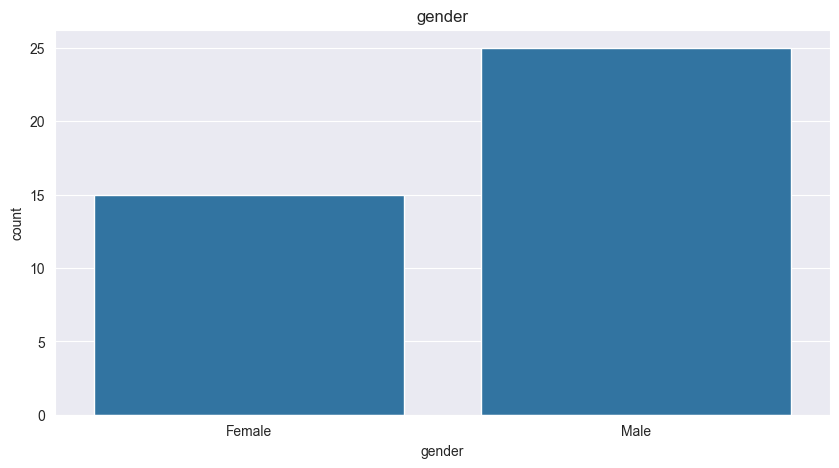

In [45]:
#create a function to plot categorical variables
def plot_cat(data, cat_var):
    sns.set_style('darkgrid')
    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x=cat_var)
    plt.title(cat_var)
    plt.show()

#test: gender
plot_cat(data, 'gender')


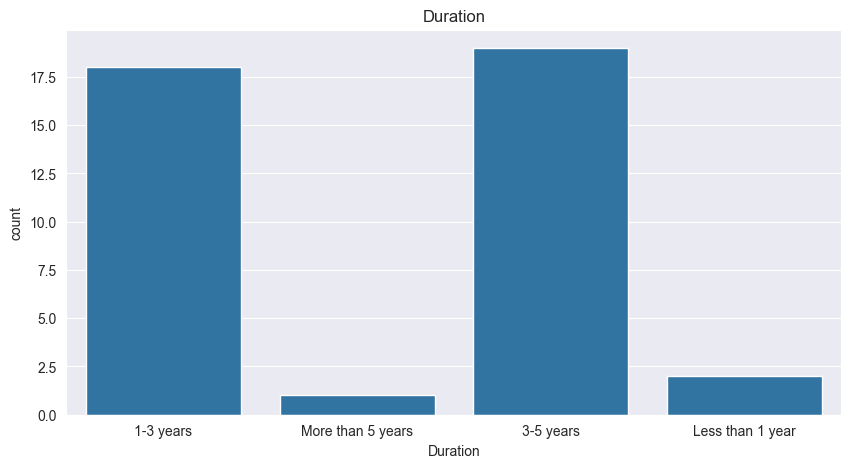

In [46]:
plot_cat(data, 'Duration')

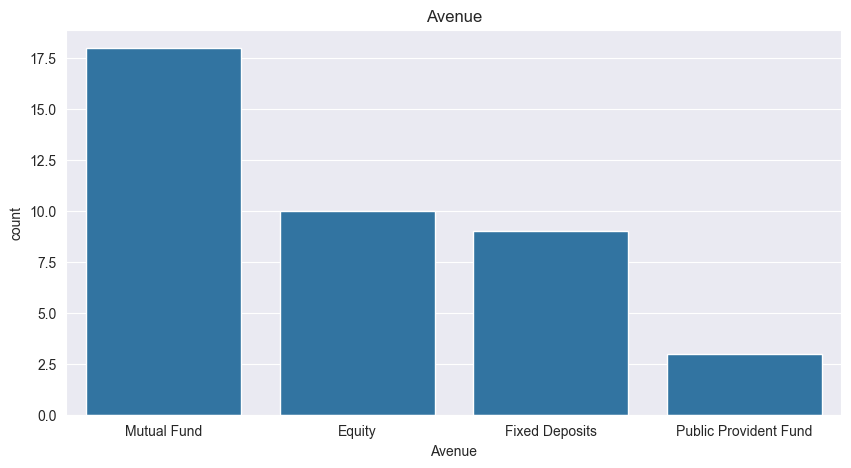

In [47]:
plot_cat(data, 'Avenue')

In [21]:
pip install -U scikit-learn


     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 460.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 991.0 kB/s eta 0:00:10
   ---------------------------------------- 0.1/9.2 MB 1.2 MB/s eta 0:00:08
    --------------------------------------- 0.2/9.2 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.2/9.2 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.2 MB 1.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.2 MB 2.2 MB/s eta 0:00:05
   --- ------------------------------------ 0.7/9.2 MB 2.4 MB/s eta 0:00:04
   ---- ----------

In [48]:
#use ordinal encoding toconvert categorical variables to numerical
from sklearn.preprocessing import OrdinalEncoder

# create a function to encode categorical variables
def encode_cat(data, cat_var):
    encoder = OrdinalEncoder()
    data[cat_var] = encoder.fit_transform(data[[cat_var]])
    return data

# for loop to encode all categorical variables
for i in data.columns:
    if data[i].dtypes == 'object':
        encode_cat(data, i)

# check data
data.head()

,gender,age,Stock_Marktet,Factor,Objective,Purpose,Duration,Invest_Monitor,Expect,Avenue
0,0.0,34,1.0,1.0,0.0,2.0,0.0,1.0,1.0,2.0
1,0.0,23,0.0,0.0,0.0,2.0,3.0,2.0,1.0,2.0
2,1.0,30,1.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0
3,1.0,22,1.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0
4,0.0,24,0.0,1.0,2.0,2.0,2.0,0.0,1.0,0.0


In [49]:
# create our target and features
x= data.drop(columns=['Avenue'])
y= data['Avenue']

#split data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [50]:
# fit a random forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)


RandomForestClassifier()

In [39]:
y_pred = rf.predict(x_test)

In [42]:
rf.score(x_test, y_test)

0.25

In [43]:
rf.score(x_train, y_train)

1.0

In [51]:
#get the classification report
from sklearn.metrics import classification_report
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.00      0.00      0.00         0
         2.0       0.75      0.50      0.60         6

    accuracy                           0.50         8
   macro avg       0.58      0.33      0.42         8
weighted avg       0.81      0.50      0.62         8



In [52]:
#extract my model as a pickle file
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [53]:
#make prediction using the first for of the test data set
print(rf.predict(x_test.iloc[[0]]))

[2.]
